# LinearRegression model
### uses some parameter to predict the production performance of the well ( RTA -> rate transient analysis)

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [2]:
df=pd.read_csv("D:/Programming/DATA - SCIENCE/oil_data/Chapter 5/Multi-linear regression/Chapter5_Geologic_DataSet.csv")

In [3]:
df

,Porosity (%),Matrix Perm (nd),Acoustic impedance (kg/m2s*10^6),Brittleness Ratio,TOC (%),Vitrinite Reflectance (%),Aroot(K)
0,8.456,292,3.080,97.680,4.64,1.848,48.306469
1,8.666,353,3.542,55.404,3.56,1.504,41.300912
2,9.814,259,4.411,87.360,3.56,2.176,49.688356
3,12.369,675,2.893,47.772,4.32,1.504,59.132694
4,12.264,457,3.498,13.128,6.04,1.520,39.503121
...,...,...,...,...,...,...,...
195,8.365,313,3.267,80.616,3.20,1.648,44.622765
196,12.593,987,3.718,53.184,3.92,1.664,64.961047
197,8.484,227,3.872,68.484,0.21,1.384,39.543047
198,10.885,448,2.728,69.900,7.56,1.880,59.004091


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Porosity (%),200.0,10.493805,2.079824,4.585000,9.03875,10.549000,12.181750,16.485000
Matrix Perm (nd),200.0,433.075000,173.101415,113.000000,312.25000,403.500000,528.750000,987.000000
Acoustic impedance (kg/m2s*10^6),200.0,3.265735,0.623574,1.408000,2.80225,3.250500,3.679500,5.093000
Brittleness Ratio,200.0,57.794340,16.955346,13.128000,45.30600,59.412000,69.915000,101.196000
TOC (%),200.0,3.970700,1.907119,0.100000,2.47000,4.120000,5.400000,8.720000
Vitrinite Reflectance (%),200.0,1.571440,0.240662,0.744000,1.41600,1.568000,1.714000,2.296000
Aroot(K),200.0,50.000000,11.505310,24.437856,41.96103,49.692285,58.986667,77.270733


#  ( 2 ) visualize the distribution of each feature

c:\users\ae504\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\ae504\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\ae504\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

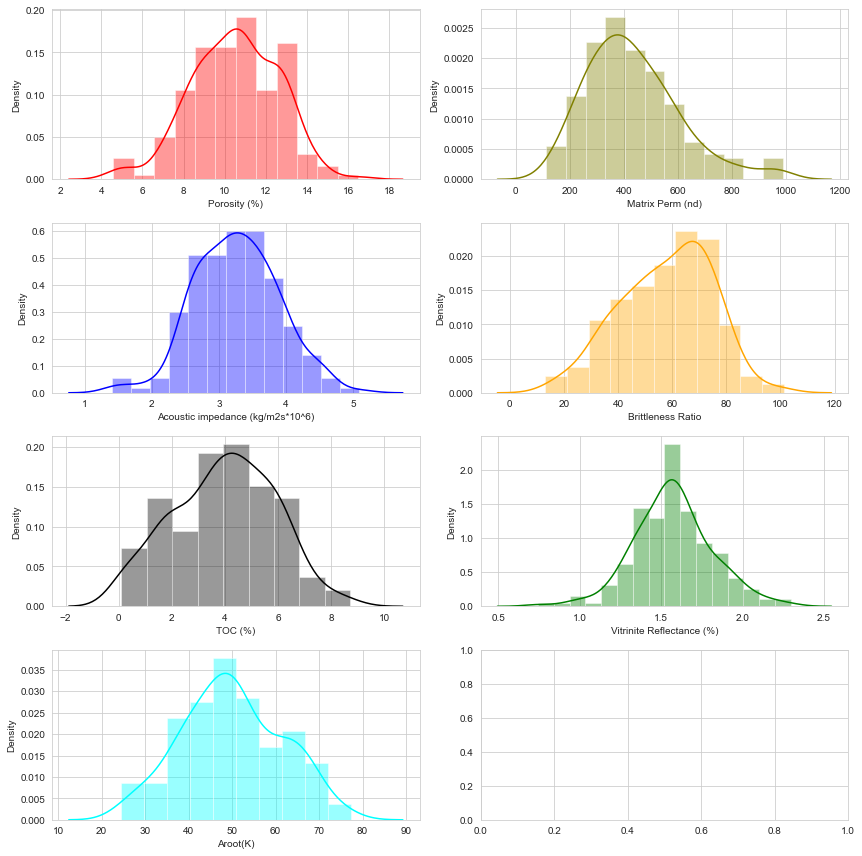

In [5]:
f, axes=plt.subplots(4, 2, figsize=(12, 12))
sns.distplot(df['Porosity (%)'], color="red", ax=axes[0, 0],kde=True)
sns.distplot(df['Matrix Perm (nd)'], color="olive", ax=axes[0, 1],kde=True)
sns.distplot(df['Acoustic impedance (kg/m2s*10^6)'],color="blue", ax=axes[1, 0],kde=True)
sns.distplot(df['Brittleness Ratio'], color="orange", ax=axes[1, 1],kde=True)
sns.distplot(df['TOC (%)'], color="black", ax=axes[2, 0],kde=True)
sns.distplot(df['Vitrinite Reflectance (%)'], color="green",ax=axes[2, 1],kde=True)
sns.distplot(df['Aroot(K)'], color="cyan", ax=axes[3, 0],kde=True)
plt.tight_layout()

c:\users\ae504\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\ae504\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\ae504\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will re

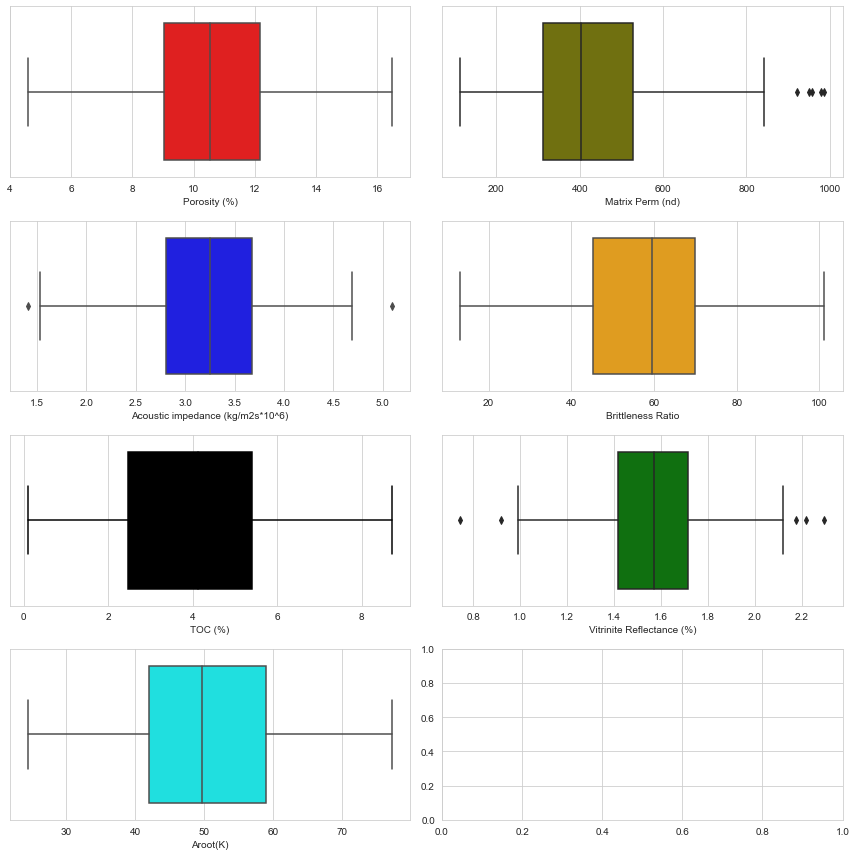

In [6]:
f, axes=plt.subplots(4, 2, figsize=(12, 12))
sns.boxplot(df['Porosity (%)'], color="red", ax=axes[0, 0])
sns.boxplot(df['Matrix Perm (nd)'], color="olive", ax=axes[0, 1])
sns.boxplot(df['Acoustic impedance (kg/m2s*10^6)'],color="blue", ax=axes[1, 0])
sns.boxplot(df['Brittleness Ratio'], color="orange", ax=axes[1, 1])
sns.boxplot(df['TOC (%)'], color="black", ax=axes[2, 0])
sns.boxplot(df['Vitrinite Reflectance (%)'], color="green",ax=axes[2, 1])
sns.boxplot(df['Aroot(K)'], color="cyan", ax=axes[3, 0])
plt.tight_layout()

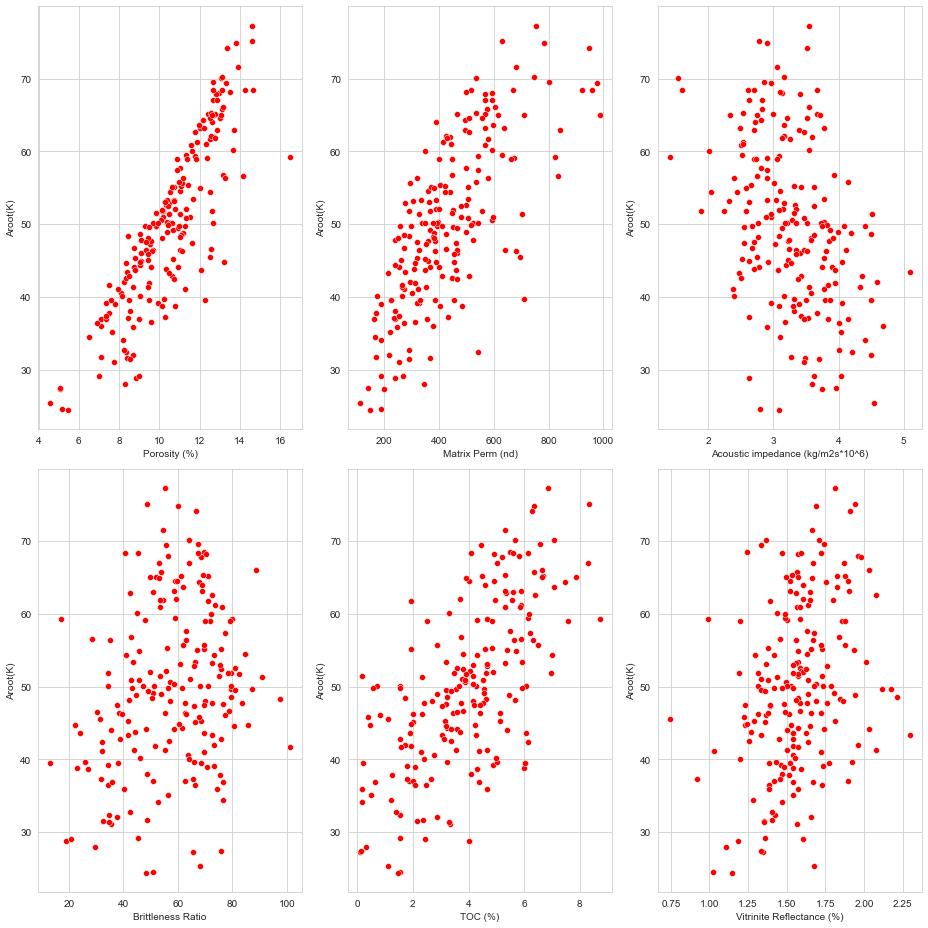

In [7]:
# the ralation between the input variables and the target variable
pf,axes=plt.subplots(2,3,figsize=(13,13))
sns.scatterplot(x="Porosity (%)",y="Aroot(K)",color="red",ax=axes[0,0],data=df)
sns.scatterplot(x="Matrix Perm (nd)",y="Aroot(K)",color="red",ax=axes[0,1],data=df)
sns.scatterplot(x="Acoustic impedance (kg/m2s*10^6)",y="Aroot(K)",color="red",ax=axes[0,2],data=df)
sns.scatterplot(x="Brittleness Ratio",y="Aroot(K)",color="red",ax=axes[1,0],data=df)
sns.scatterplot(x="TOC (%)",y="Aroot(K)",color="red",ax=axes[1,1],data=df)
sns.scatterplot(x="Vitrinite Reflectance (%)",y="Aroot(K)",color="red",ax=axes[1,2],data=df)
plt.tight_layout()

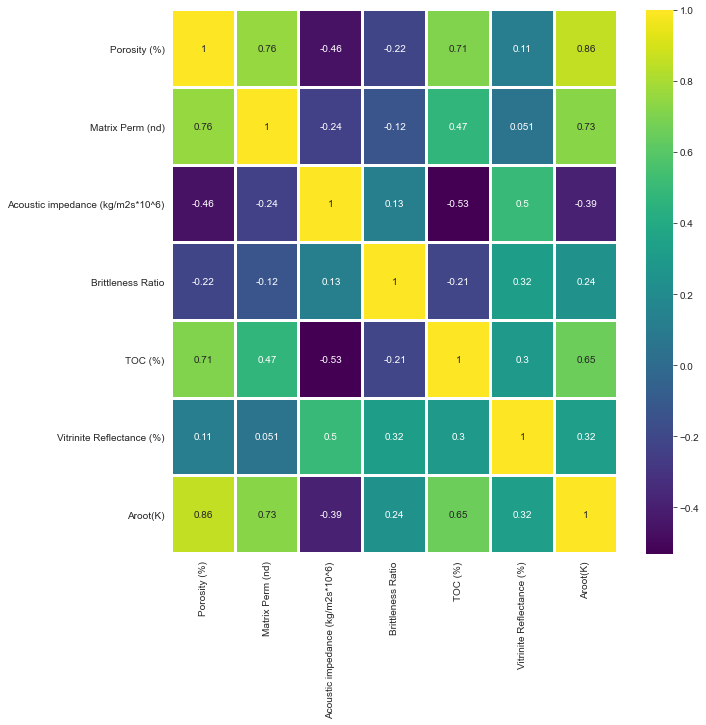

In [8]:
# or plot the correlations
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap="viridis",linecolor="white",linewidths=2)
plt.show()

# feature selection:
## form the heatmap:
- pososity and permeability has high colleration
- also , porosity and Toc
- the porosity has the higher effect on the target varialbe 
### so, we only take porosity form these
#### new featuers are [ Porosity (%) , Acoustic impedance (kg/m2s*10^6)	, Brittleness Ratio ,Vitrinite Reflectance (%) ]


# scaling and fitting the data

In [7]:
df_new=df[[ "Porosity (%)" , "Acoustic impedance (kg/m2s*10^6)", "Brittleness Ratio","Vitrinite Reflectance (%)","Aroot(K)" ]]
from sklearn.preprocessing import MinMaxScaler
normalizer= MinMaxScaler(feature_range=(0,1))
df_scaled=normalizer.fit_transform(df_new)
df_scaled=pd.DataFrame(df_scaled,columns=[ "Porosity (%)" , "Acoustic impedance (kg/m2s*10^6)", "Brittleness Ratio","Vitrinite Reflectance (%)" ,"Aroot(K)"])
df_scaled

,Porosity (%),Acoustic impedance (kg/m2s*10^6),Brittleness Ratio,Vitrinite Reflectance (%),Aroot(K)
0,0.325294,0.453731,0.960076,0.711340,0.451776
1,0.342941,0.579104,0.480038,0.489691,0.319177
2,0.439412,0.814925,0.842894,0.922680,0.477932
3,0.654118,0.402985,0.393378,0.489691,0.656690
4,0.645294,0.567164,0.000000,0.500000,0.285149
...,...,...,...,...,...
195,0.317647,0.504478,0.766317,0.582474,0.382052
196,0.672941,0.626866,0.454830,0.592784,0.767007
197,0.327647,0.668657,0.628560,0.412371,0.285905
198,0.529412,0.358209,0.644638,0.731959,0.654256


In [9]:
X=df_scaled[[ "Porosity (%)" , "Acoustic impedance (kg/m2s*10^6)", "Brittleness Ratio","Vitrinite Reflectance (%)" ]]
Y=df_scaled["Aroot(K)"]

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.3)



In [11]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [13]:
lr.intercept_

-0.3386527806976637

In [14]:
lr.coef_

array([ 1.14282748, -0.1243056 ,  0.45241544,  0.17722542])

In [15]:
y_pred=lr.predict(x_test)

# now  , evaluating the model 

c:\users\ae504\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


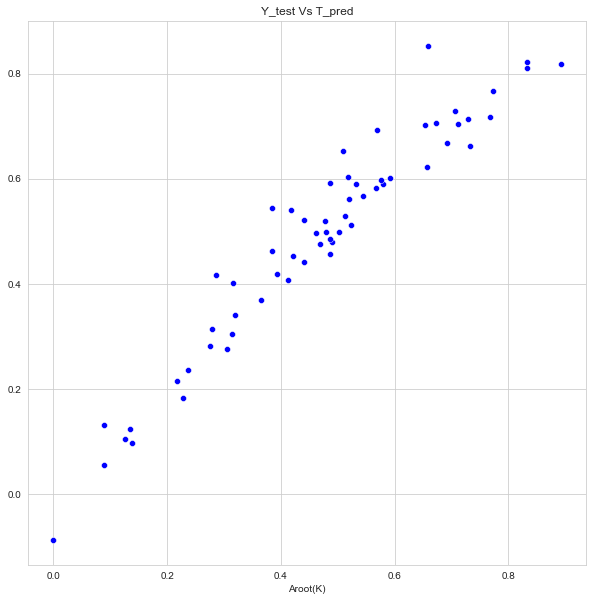

In [16]:
plt.figure(figsize=(10,10))
plt.title("Y_test Vs T_pred")
sns.scatterplot(y_test,y_pred,color="blue")
plt.show()

In [18]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9094553613037506

In [42]:
from xgboost import XGBRegressor
xg=XGBRegressor(n_estimators=1000,learning_rate=.1,n_jobs=4,random_state=0,gamma=.15)
xg.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.15, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [43]:
xg_pred=xg.predict(x_test)

In [44]:
print(f"MAE : {mean_absolute_error(y_test,xg_pred)}")
print(f"MSE : {mean_squared_error(y_test,xg_pred)}")
print(f"RMSE : {np.sqrt(mean_absolute_error(y_test,xg_pred))}")

MAE : 0.06649074363038984
MSE : 0.008328291698605016
RMSE : 0.25785799120909525


In [45]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(f"MAE : {mean_absolute_error(y_test,y_pred)}")
print(f"MSE : {mean_squared_error(y_test,y_pred)}")
print(f"RMSE : {np.sqrt(mean_absolute_error(y_test,y_pred))}")

MAE : 0.042179708495351034
MSE : 0.003663694861370414
RMSE : 0.2053769911537099


<Figure size 432x288 with 0 Axes>

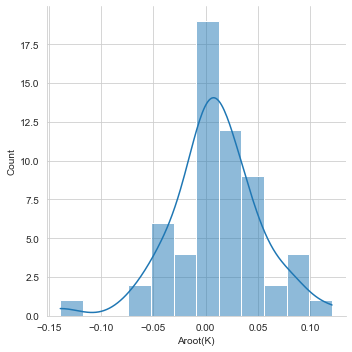

In [19]:
plt.figure()
sns.displot(y_test-y_pred,kde=True)

# <span style="color:red">One-variable-at-a-time sensitivity analysis

- technique to see the effect of each feature on the target variable
- each feature is selected and cahngeing its value while the other features remans constant [ the average value of the set ]
- it is necessary that when chaning the variables it does'nt exceed the range of the set.( min<= value <= max ) of the set, as the scaling doesn't change 

In [24]:
# import the data of sensitivity analysis
df_sen=pd.read_excel("D:/Programming/DATA - SCIENCE/oil_data/Chapter 5/Multi-linear regression/Chapter5_Geologic_Sensitivity_DataSet.xlsx")

In [25]:
df_sen

,Porosity (%),Acoustic impedance (kg/m2s*10^6),Brittleness Ratio,Vitrinite Reflectance (%),Aroot(K)
0,4.5,3.25,59,1.50,50
1,5.5,3.25,59,1.50,50
2,6.5,3.25,59,1.50,50
3,7.5,3.25,59,1.50,50
4,8.5,3.25,59,1.50,50
...,...,...,...,...,...
64,10.5,3.25,59,1.54,50
65,10.5,3.25,59,1.74,50
66,10.5,3.25,59,1.94,50
67,10.5,3.25,59,2.14,50


## the range of each feature test
- 0:12 -> the porosity
- 13:49 -> acoustic impedence
- 50: 59 -> BR
-  60 : 69

In [26]:
df_sen_scaled=normalizer.transform(df_sen)

In [28]:
df_sen_final=pd.DataFrame(df_sen_scaled,columns=df_sen.columns)

In [29]:
df_sen_final

,Porosity (%),Acoustic impedance (kg/m2s*10^6),Brittleness Ratio,Vitrinite Reflectance (%),Aroot(K)
0,-0.007143,0.499864,0.52087,0.487113,0.48383
1,0.076891,0.499864,0.52087,0.487113,0.48383
2,0.160924,0.499864,0.52087,0.487113,0.48383
3,0.244958,0.499864,0.52087,0.487113,0.48383
4,0.328992,0.499864,0.52087,0.487113,0.48383
...,...,...,...,...,...
64,0.497059,0.499864,0.52087,0.512887,0.48383
65,0.497059,0.499864,0.52087,0.641753,0.48383
66,0.497059,0.499864,0.52087,0.770619,0.48383
67,0.497059,0.499864,0.52087,0.899485,0.48383


In [31]:
X=df_sen_final.drop("Aroot(K)",axis=1)
Y=df_sen_final["Aroot(K)"]

In [33]:
Y_pred=lr.predict(X)

In [34]:
Y_pred

array([-9.62677067e-02,  1.92325728e-04,  9.66523581e-02,  1.93112391e-01,
        2.89572423e-01,  3.86032455e-01,  4.82492488e-01,  5.78952520e-01,
        6.75412552e-01,  7.71872585e-01,  8.68332617e-01,  9.64792650e-01,
        1.06125268e+00,  5.42165555e-01,  5.38939984e-01,  5.35714413e-01,
        5.32488842e-01,  5.29263270e-01,  5.26037699e-01,  5.22812128e-01,
        5.19586557e-01,  5.16360986e-01,  5.13135414e-01,  5.09909843e-01,
        5.06684272e-01,  5.03458701e-01,  5.00233129e-01,  4.97007558e-01,
        4.93781987e-01,  4.90556416e-01,  4.87330845e-01,  4.84105273e-01,
        4.80879702e-01,  4.77654131e-01,  4.74428560e-01,  4.71202988e-01,
        4.67977417e-01,  4.64751846e-01,  4.61526275e-01,  4.58300703e-01,
        4.55075132e-01,  4.51849561e-01,  4.48623990e-01,  4.45398419e-01,
        4.42172847e-01,  4.38947276e-01,  4.35721705e-01,  4.32496134e-01,
        4.29270562e-01,  4.26044991e-01,  2.35980644e-01,  2.89570175e-01,
        3.43159707e-01,  

## note:
## this Y_pred is normalized, so we get the actual values of them

In [37]:
m=df["Aroot(K)"].min()
m

24.43785618

In [39]:
M=df["Aroot(K)"].max()
M

77.27073327

In [42]:
rang= M-m
rang

52.83287709

### the normalizing formula is x* =x-min(x) / max(x)-min(x)

In [44]:
Y_data=pd.DataFrame(Y_pred,columns=["predited"])

In [49]:
last=Y_data.apply(lambda x: (x * rang )+ m)
last

,predited
0,19.351756
1,24.448017
2,29.544278
3,34.640539
4,39.736800
...,...
64,50.196524
65,51.532534
66,52.868543
67,54.204553


## now, let's plot the relations

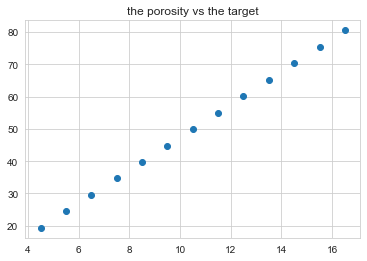

In [55]:
plt.figure()
xx=np.linspace(4.5,16.5,13)
plt.scatter(xx,last.iloc[0:13])
plt.title("the porosity vs the target")
plt.show()

Text(0, 0.5, 'Aroot(K)')

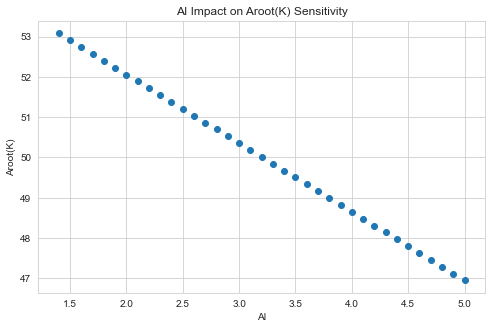

In [62]:
plt.figure(figsize=(8,5))
AI=np.linspace(1.4,5,37)
plt.scatter(AI,last.iloc[13:50])
plt.title('AI Impact on Aroot(K) Sensitivity')
plt.xlabel('AI')
plt.ylabel('Aroot(K)')

### and so on

In [22]:
from sklearn.linear_model import Lasso

In [40]:
X=df_scaled[[ "Porosity (%)" , "Acoustic impedance (kg/m2s*10^6)", "Brittleness Ratio","Vitrinite Reflectance (%)" ]]
Y=df_scaled["Aroot(K)"]
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.3)

In [59]:
l=Lasso(alpha=0)
l.fit(x_train,y_train)

<ipython-input-59-f7fa5dfcf84e>:2: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  l.fit(x_train,y_train)
c:\users\ae504\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\users\ae504\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.20194448491115918, tolerance: 0.0005892599979074245
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0)

In [60]:
y_pred2=l.predict(x_test)

In [61]:
r2_score(y_test,y_pred2)

0.9624663002883862

In [62]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(f"MAE : {mean_absolute_error(y_test,y_pred2)}")
print(f"MSE : {mean_squared_error(y_test,y_pred2)}")
print(f"RMSE : {np.sqrt(mean_absolute_error(y_test,y_pred2))}")

MAE : 0.03399106802371496
MSE : 0.002159890066485699
RMSE : 0.1843666673336451


In [63]:
from sklearn.linear_model import Ridge

In [146]:
r=Ridge(alpha=0.02564102564102555)
r.fit(x_train,y_train)

Ridge(alpha=0.02564102564102555)

In [147]:
y_pred3=r.predict(x_test)

In [148]:
r2_score(y_test,y_pred3)

0.9641457123754774

In [136]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(f"MAE : {mean_absolute_error(y_test,y_pred3)}")
print(f"MSE : {mean_squared_error(y_test,y_pred3)}")
print(f"RMSE : {np.sqrt(mean_absolute_error(y_test,y_pred3))}")

MAE : 0.03302857448978262
MSE : 0.0020632477020954406
RMSE : 0.18173765292250976


In [164]:
from sklearn.model_selection import GridSearchCV
params={"alpha":np.linspace(0,1,20)}
r_g=GridSearchCV(l,params,cv=5,scoring="neg_root_mean_squared_error")


In [165]:
r_g.fit(x_train,y_train)

c:\users\ae504\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
c:\users\ae504\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\users\ae504\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.17097066251295356, tolerance: 0.00044395895174334385
  model = cd_fast.enet_coordinate_descent(
c:\users\ae504\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:59

GridSearchCV(cv=5, estimator=Lasso(alpha=0),
             param_grid={'alpha': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])},
             scoring='neg_root_mean_squared_error')

In [166]:
r_g.best_params_

{'alpha': 0.0}

In [167]:
r_g.best_score_

-0.054667679711683494

In [168]:
from sklearn.metrics import SCORERS

In [169]:
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [170]:
pred=r_g.predict(x_test)

In [171]:
r2_score(y_test,pred)

0.9624663002883862

In [172]:
np.sqrt(mean_squared_error(y_test,pred))

0.046474617443134476